<a href="https://colab.research.google.com/github/elolaine/AI4Biologists/blob/main/notebooks/PLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import path
import pandas as pd
import numpy as np
from numpy import asarray
import seaborn as sns
import matplotlib.pyplot as plt
import gc
from sklearn.manifold import TSNE #t-sne for data visualisation of the embedding vectors
import time
from tqdm.keras import TqdmCallback
import h5py

In [ ]:
!gdown --id '1d6Puv5Sr0nVNwYazcEygKljjDcD5vPRG' 

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1d6Puv5Sr0nVNwYazcEygKljjDcD5vPRG
To: /content/input.fasta
100% 25.7k/25.7k [00:00<00:00, 7.27MB/s]


In [ ]:
!gdown --id '1GJpC5YaL84aqHAQ-ZO7BCWh-q0vuOnzx' 

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1GJpC5YaL84aqHAQ-ZO7BCWh-q0vuOnzx
To: /content/input.csv
100% 28.8k/28.8k [00:00<00:00, 33.5MB/s]


In [ ]:
df = pd.read_csv('/content/input.csv')

In [ ]:
df

,Unnamed: 0,PDB,Seq,Class
0,0,1E0L,GATAVSEWTEYKTADGKTYYYNNRTLESTWEKPQELK,Cat
1,1,1I6C,KLPPGWEKRMSRSSGRVYYFNHITNASQWERPSGNSSSG,Cat
2,2,1IFY,SEYETMLTEIMSMGYERERVVAALRASYNNPHRAVEYLLTGIPG,Cat
3,3,1K1V,LTDEELVTMSVRELNQHLRGLSKEEIIQLKQRRRTLKNRGY,Cat
4,4,1PGY,LVDEVKDMEIARLMSLGLSIEEATEFYENDVTYERYLEILKSKQ,Cat
...,...,...,...,...
408,408,2QFF,QNEKLANELKSLLDELNVNELATGSLNTYYKRTIKISGQKAMYALK...,Cat
409,409,3Q9P,DRWRVSLDVNHFAPDELTVKTKDGVVEITGKHAARQDEHGYISRCF...,Cat
410,410,5GHB,HINLKVAGQDGSVVQFKIKRHTPLSKLMKAYCERQGLSMRQIRFRF...,Lion
411,411,2FGG,QIDVLIEEHDERTRAKARLSWAGRQMVGVGLARLDPADEPVAQIGD...,Cat


Some sections:
- Analyzing data
- Preprocessing data

# Bepler and Berger

In [ ]:
!git clone https://github.com/tbepler/prose.git

Cloning into 'prose'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 26 (delta 1), reused 23 (delta 1), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [ ]:
!wget -nc -P prose/ http://bergerlab-downloads.csail.mit.edu/prose/saved_models.zip

--2022-07-22 15:18:04--  http://bergerlab-downloads.csail.mit.edu/prose/saved_models.zip
Resolving bergerlab-downloads.csail.mit.edu (bergerlab-downloads.csail.mit.edu)... 128.30.48.147
Connecting to bergerlab-downloads.csail.mit.edu (bergerlab-downloads.csail.mit.edu)|128.30.48.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 581846360 (555M) [application/zip]
Saving to: ‘prose/saved_models.zip’

saved_models.zip    100%[===================>] 554.89M  98.2MB/s    in 5.9s    

2022-07-22 15:18:10 (94.5 MB/s) - ‘prose/saved_models.zip’ saved [581846360/581846360]



In [ ]:
!unzip -q -n prose/saved_models.zip -d prose/

In [ ]:
#!pip install -r prose/requirements.txt

Extract the embeddings

In [ ]:
!python3 prose/embed_sequences.py --pool avg -o prose/data/output.h5 /content/input.fasta

# loading the pre-trained ProSE MT model
# writing: prose/data/output.h5
# embedding with pool=avg


In [ ]:
hf_embeddings = h5py.File('prose/data/output.h5', 'r')
embeddings = {x: np.array(hf_embeddings[x]) for x in df.PDB.to_list()}

In [ ]:
print(list(embeddings.keys())[:10])
print(list(df.PDB.to_list())[:10])

['1E0L', '1I6C', '1IFY', '1K1V', '1PGY', '1PV0', '1V1D', '1V92', '1VII', '1W4E']
['1E0L', '1I6C', '1IFY', '1K1V', '1PGY', '1PV0', '1V1D', '1V92', '1VII', '1W4E']


In [ ]:
embeddings

{'1A0N': array([ 0.06896552,  0.03448276,  0.03448276, ..., -0.04993632,
         0.20081268,  0.01027169], dtype=float32),
 '1A32': array([ 0.04761905,  0.14285715,  0.06349207, ..., -0.07667622,
         0.02830475, -0.06397349], dtype=float32),
 '1AOY': array([ 0.10144928,  0.04347826,  0.04347826, ..., -0.01416637,
         0.09747193,  0.03889601], dtype=float32),
 '1B7I': array([ 0.09375   ,  0.0625    ,  0.0625    , ..., -0.12007689,
         0.05035779, -0.08765844], dtype=float32),
 '1B7J': array([ 0.109375  ,  0.046875  ,  0.0625    , ..., -0.11520072,
         0.06140069, -0.09404498], dtype=float32),
 '1BK2': array([ 0.05357143,  0.03571429,  0.05357143, ..., -0.09505568,
         0.21972589, -0.01582262], dtype=float32),
 '1BOD': array([ 0.        ,  0.        ,  0.01470588, ...,  0.01261869,
        -0.02730047, -0.06243878], dtype=float32),
 '1CSQ': array([ 0.07462686,  0.01492537,  0.04477612, ..., -0.08324197,
         0.0403625 ,  0.13094582], dtype=float32),
 '1E0L':

In [ ]:
X = np.vstack(list(embeddings.values()))

Analyze the embeddings

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


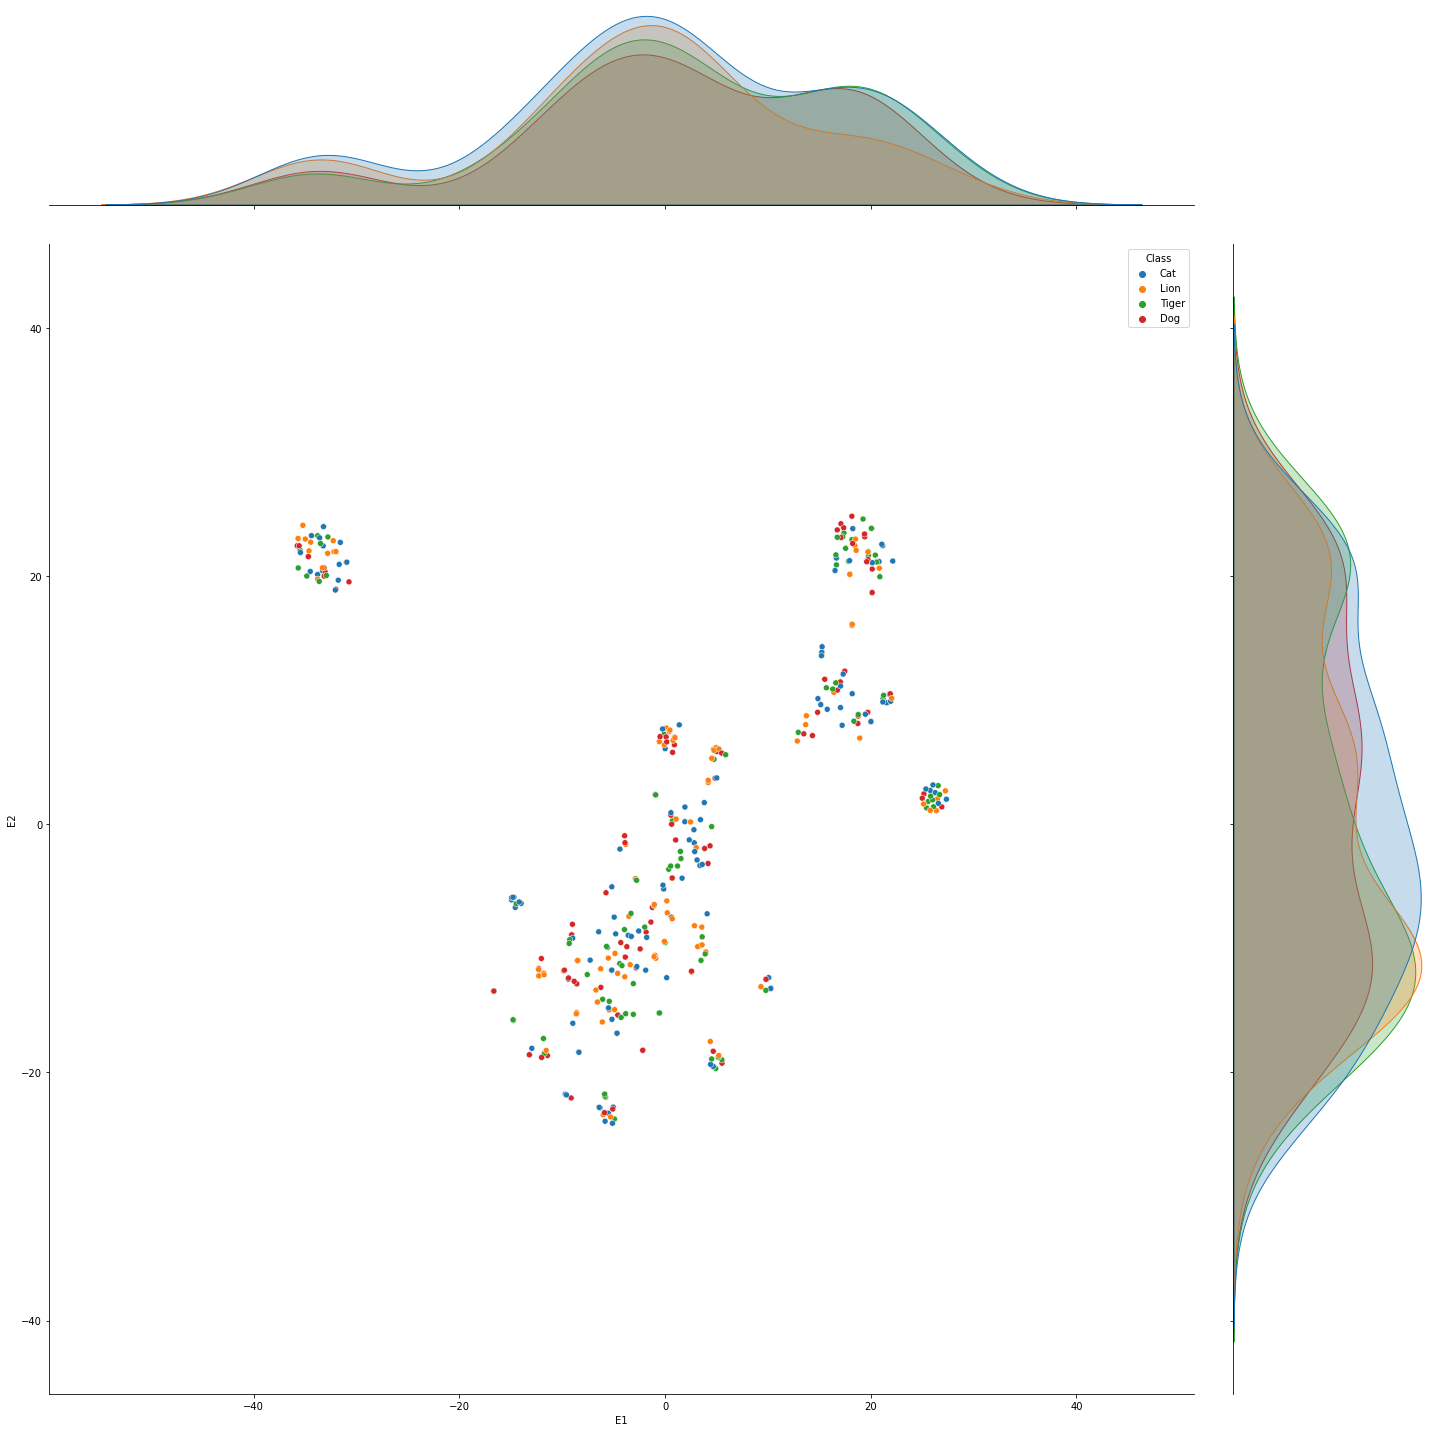

In [ ]:
X_embedded = TSNE(n_components=2,random_state=42).fit_transform(X)

df['E1'] = X_embedded[:,0]
df['E2'] = X_embedded[:,1]

#plt.rcParams.update({'font.size': 10})
sns.jointplot(data=df, x='E1', y='E2', hue = 'Class', height=20)
#sns.jointplot(data=df, x='E1', y='E2', height=10)

In [ ]:
X_embedded

array([[ -32.147305, -293.99146 ],
       [-114.43374 ,  -16.287865],
       [-309.85068 , -376.27866 ],
       [-392.13712 ,  -98.57503 ]], dtype=float32)

Designed by Yasser MOHSENI BEHBAHANI and Élodie LAINE, LCQB, Sorbonne Université, 2022

<img src='https://drive.google.com/uc?id=1shvaqXgnRa2aCji30gJ02hwI_Ux6NEp6'>